# Import User level data

In [2]:
import numpy as np
import pandas as pd
df_user = pd.read_csv('../all/train_user.csv',index_col=0)

/Users/ziyufan/anaconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Split the data into Train and test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_user.drop(['is_transaction', 'fullVisitorId', 'transactionRevenue_total'], axis=1), 
    df_user['is_transaction'], test_size=0.33, random_state=42)

# Classification : Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
reg_score = reg.score(X_test, y_test)

/Users/ziyufan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
confusion_matrix

array([[235109,    555],
       [  2397,    794]])

In [6]:
reg_score

0.9876410374494986

# User Level Revenue Regression

Draw the distribution of Uses with Revenue

In [7]:
from matplotlib import pyplot as plt
rev_user = df_user[df_user['is_transaction']==1]
rev_use_totalTrans = rev_user['transactionRevenue_total']
plt.hist(rev_use_totalTrans)
plt.xlabel('Total transactionRevenue')
plt.ylabel('Frequency')
plt.title('User level Total TransactionRevenue Histogram')

Text(0.5, 1.0, 'User level Total TransactionRevenue Histogram')

The data is a little bit right skewed. Need transformation.

First Try a simple Muti LinearRegression model on original data

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
X_train, X_test, y_train, y_test = train_test_split(
    rev_user.drop(['is_transaction', 'fullVisitorId', 'transactionRevenue_total'], axis=1), 
    rev_user['transactionRevenue_total'], test_size=0.33, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
reg_score = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

In [9]:
reg_score ##R^2

0.17004940483403574

In [10]:
rmse

1.0884143996877258

Lasso Regression

In [11]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)
reg_score = lasso_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

In [12]:
reg_score ## R^2

0.1823961153755701

In [13]:
rmse

1.0802881982471462

Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.01)
ridge_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_test)
reg_score = ridge_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

In [15]:
reg_score

0.1776778930591425

In [16]:
rmse

1.0834007736840796

Transform data and use lasso again

In [17]:
from sklearn.preprocessing import power_transform

In [18]:
data = np.array(rev_use_totalTrans).reshape(-1,1)

In [19]:
trans_totalTrans = power_transform(data, method='box-cox')

In [21]:
y = pd.DataFrame(trans_totalTrans)

Text(0.5, 1.0, 'Transformed User level Total TransactionRevenue Histogram')

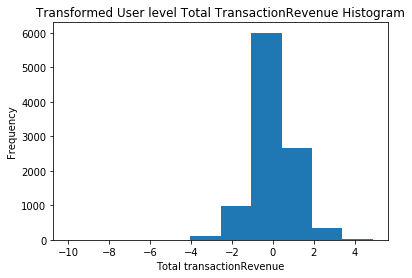

In [27]:
plt.hist(y[0])
plt.xlabel('Total transactionRevenue')
plt.ylabel('Frequency')
plt.title('Transformed User level Total TransactionRevenue Histogram')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    rev_user.drop(['is_transaction', 'fullVisitorId', 'transactionRevenue_total'], axis=1), 
    y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)
reg_score = lasso_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

In [49]:
reg_score ##R^2

0.1775060074778156

In [50]:
rmse

0.8783568366906934